
Contours can be explained simply as a curve joining all the continuous points (along the boundary), having same color or intensity. The contours are a useful tool for shape analysis and object detection and recognition. 
https://docs.opencv.org/3.4/d4/d73/tutorial_py_contours_begin.html#:~:text=What%20are%20contours%3F,better%20accuracy%2C%20use%20binary%20images.


Edge detection just gives points where image intensity changes drastically. It may or may not form a closed shape. The main objective of contour detection is find a closed shape and draw the boundary of the object. Contour detection is also used to determine shape of an object using properties like aspect ratio ,extent and solidity.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def show(image = None, title = "Image"):
    size = 16
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

For better accuracy, use binary images. So before finding contours, apply threshold or canny edge detection.

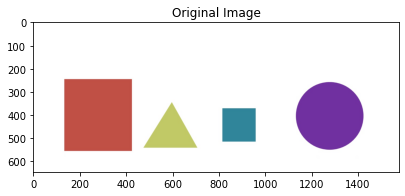

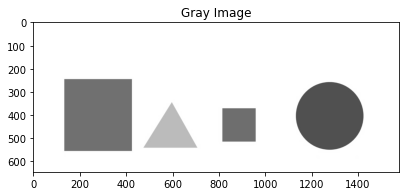

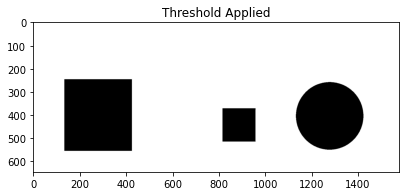

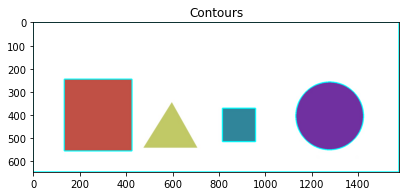

In [2]:
#Applying Threshold
image = cv2.imread("images/contour_find.jpg")
show(image , "Original Image")
im_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #Grayscale
show(im_gray , "Gray Image")

ret, thresh = cv2.threshold(im_gray, 127, 255, 0) #apply threshold
show(thresh,"Threshold Applied")

#find contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#draw contours on the image
cv2.drawContours(image,contours, -1 , (255,255,0),3)
show(image,"Contours")

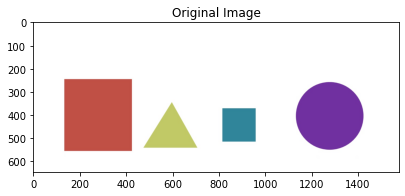

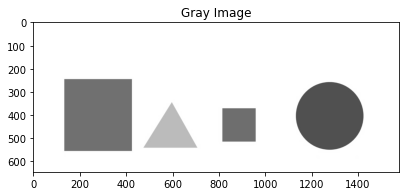

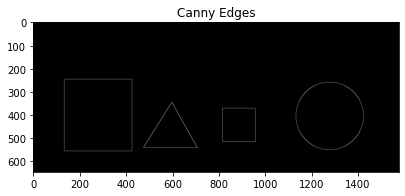

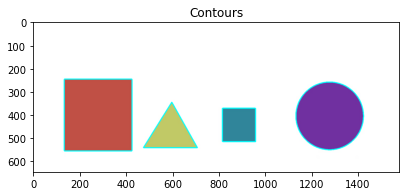

In [3]:
#Applying Canny Edge Detection
image = cv2.imread("images/contour_find.jpg")
show(image , "Original Image")
im_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #Grayscale
show(im_gray , "Gray Image")

edge_detect = cv2.Canny(im_gray, 50, 200)
show(edge_detect, 'Canny Edges')

#find contours
contours, hierarchy = cv2.findContours(edge_detect, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#draw contours on the image
cv2.drawContours(image,contours, -1 , (255,255,0),3)
show(image,"Contours")

**ApproxPolyDP**


The process of approximation of a shape of contour to another shape consisting of a lesser number of vertices in such a way that the distance between the contours of shapes is equal to the specified precision or lesser than the specified precision is called approximation of a shape of the contour.


https://www.educba.com/opencv-approxpolydp/

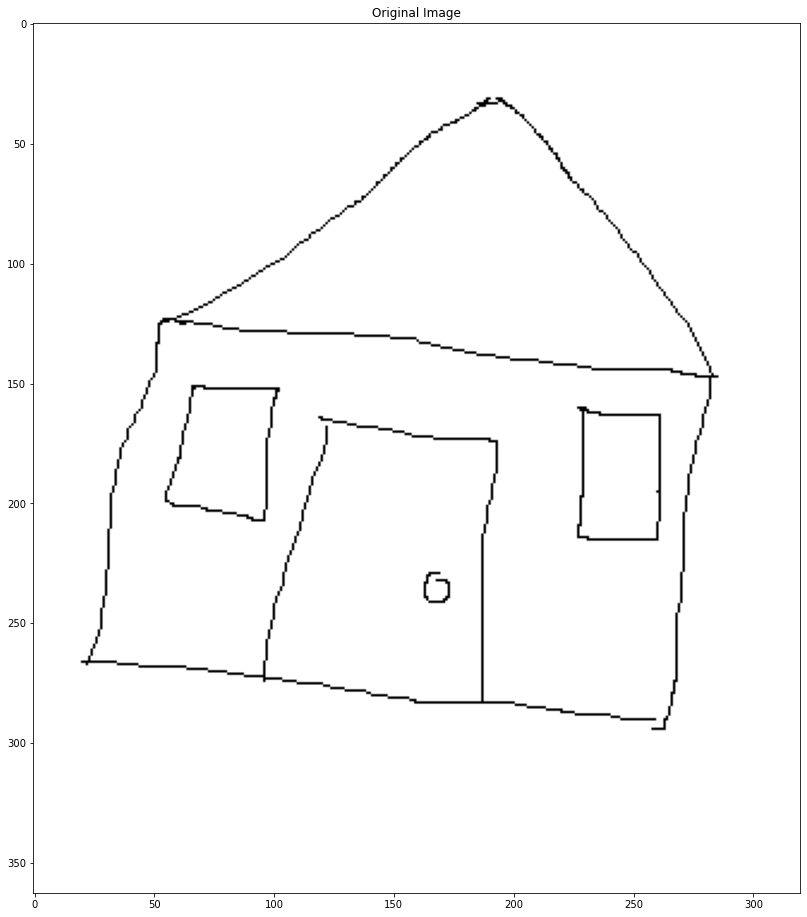

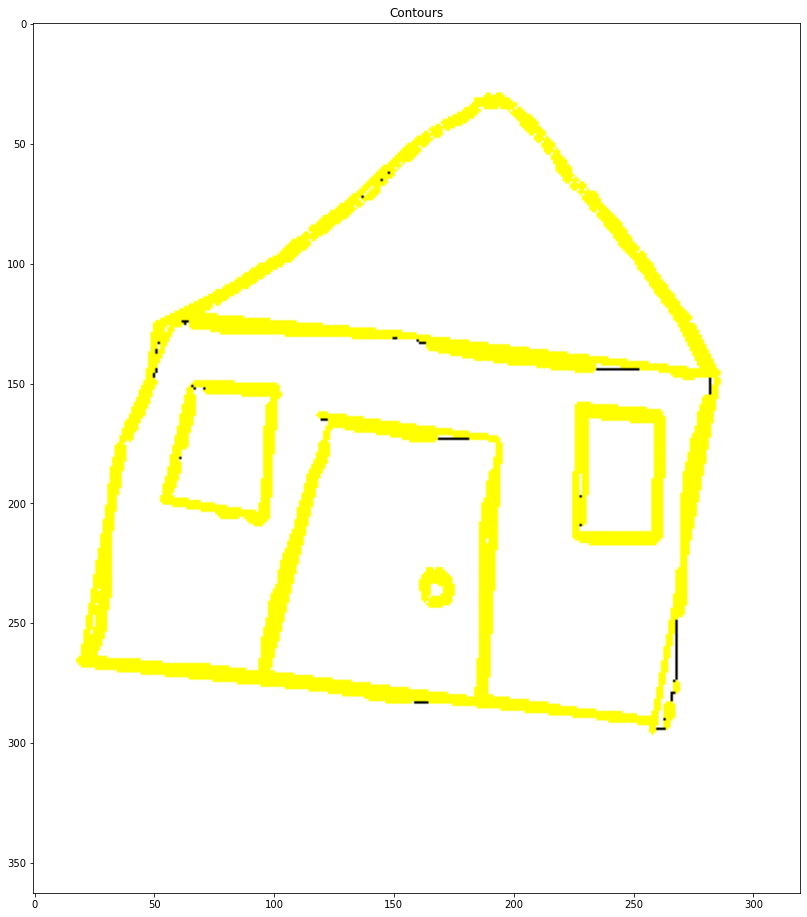

In [4]:
image = cv2.imread("images/house.png")
show(image,"Original Image")

gray_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray_img,50,200)
contours, hierarchy = cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

for c in contours:
    accuracy = 0.03*cv2.arcLength(c,True)
    approximation = cv2.approxPolyDP(c,accuracy,True)
    cv2.drawContours(image,[approximation],0,(0,255,255),2)
    #show(image,"Contours") if you want to see the process step by step
show(image,"Contours")

# Convex Hull

Given a set of points in the plane. the convex hull of the set is the smallest convex polygon that contains all the points of it.

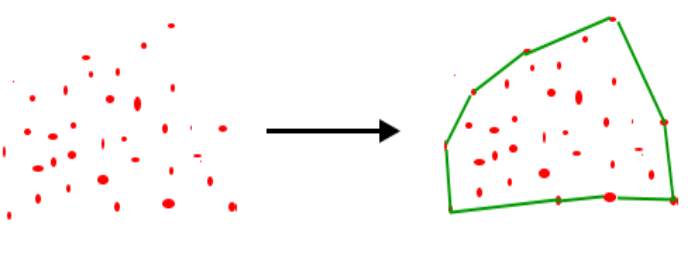
_source_ : https://www.geeksforgeeks.org/convex-hull-set-2-graham-scan/

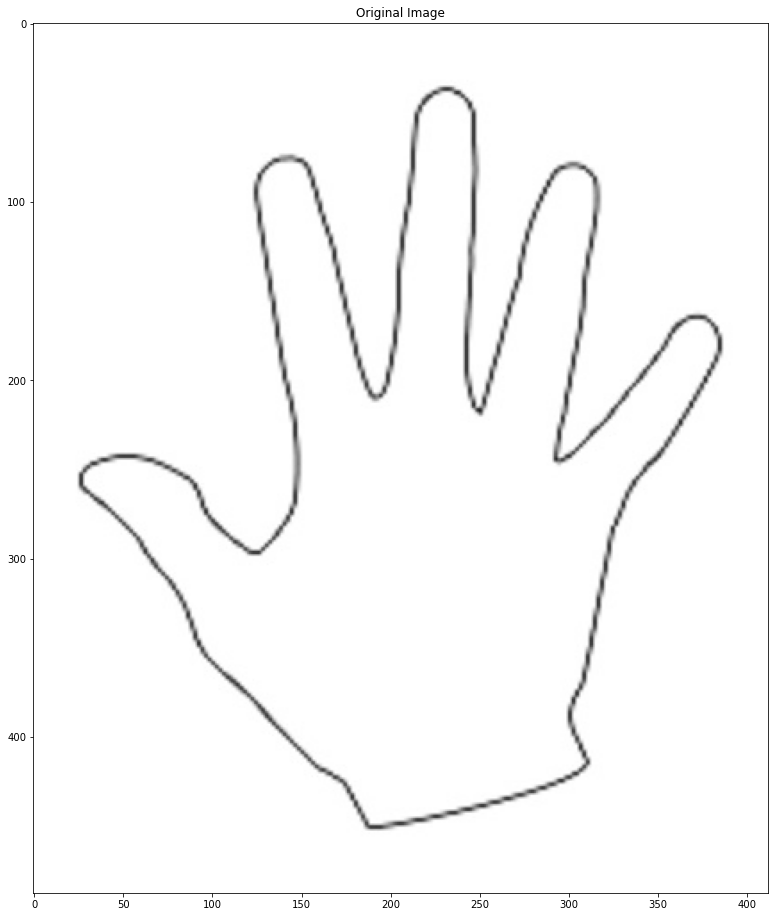

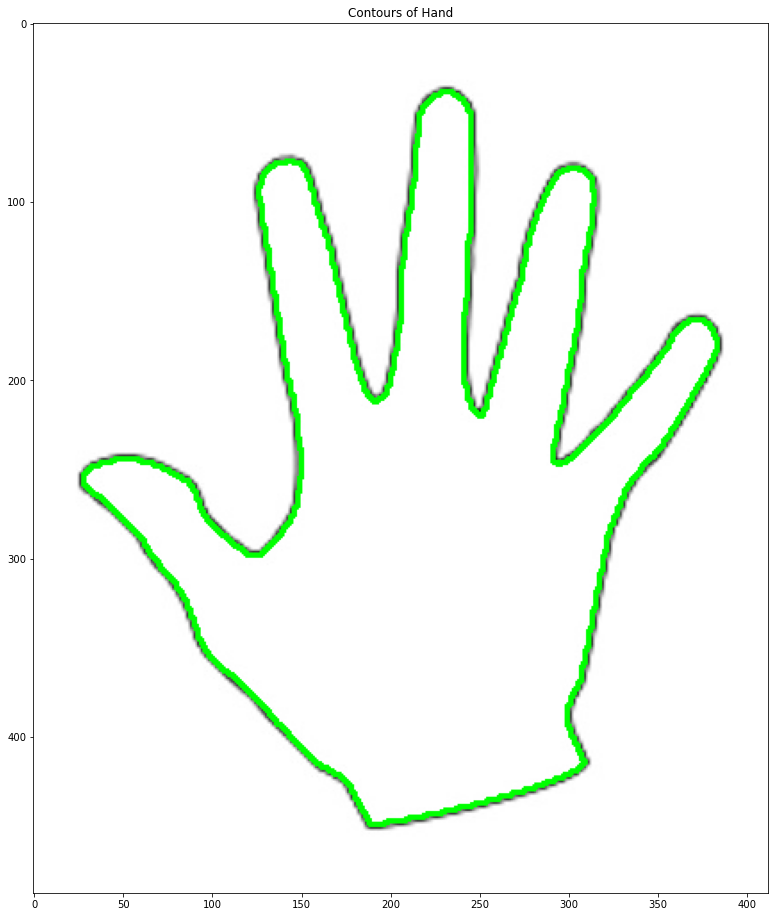

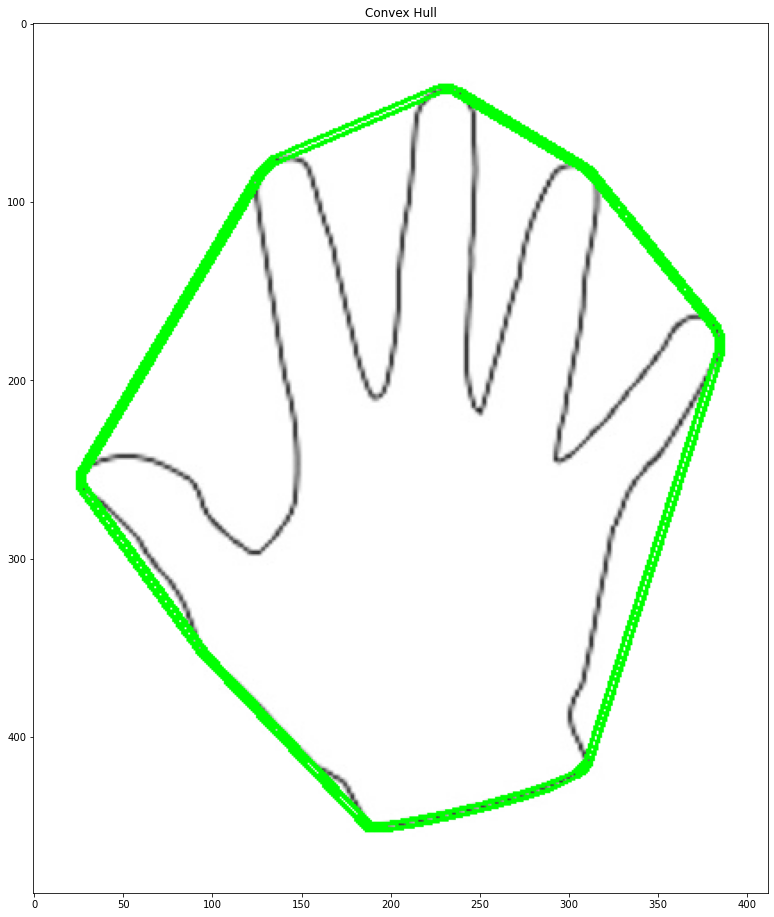

In [10]:
image = cv2.imread("images/hand.jpg")
show(image,"Original Image")

img_copy = image.copy()
gray_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray_img, 176, 255, 0)

contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(image, contours, 0, (0, 255, 0), 2)
show(image, 'Contours of Hand')

n = len(contours) - 1
contours = sorted(contours, key=cv2.contourArea, reverse=False)[:n]
# Iterate through contours and draw the convex hull
for c in contours:
    hull = cv2.convexHull(c)
    cv2.drawContours(img_copy, [hull], 0, (0, 255, 0), 2)
    
show( img_copy , 'Convex Hull')

# Line Circle Blob Detection



- Line Detection : In image processing, line detection is an algorithm that takes a collection of n edge points and finds all the lines on which these edge points lie. The most popular line detectors are the Hough transform and convolution-based techniques. 
https://en.wikipedia.org/wiki/Line_detection
https://docs.opencv.org/3.4/d9/db0/tutorial_hough_lines.html

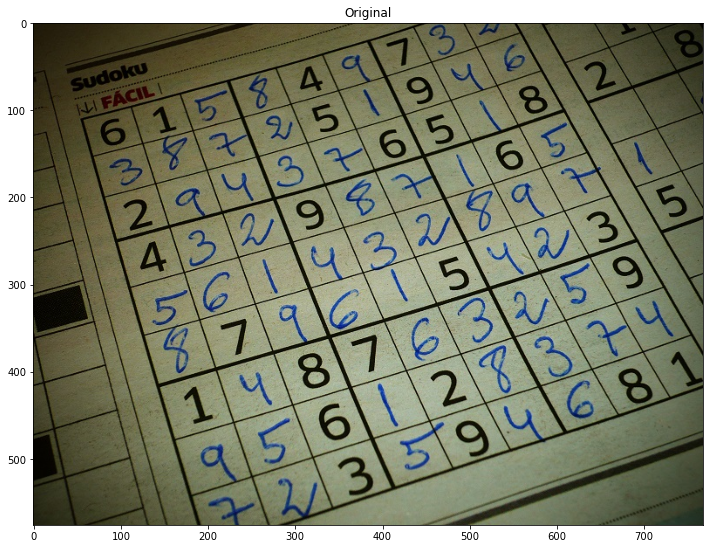

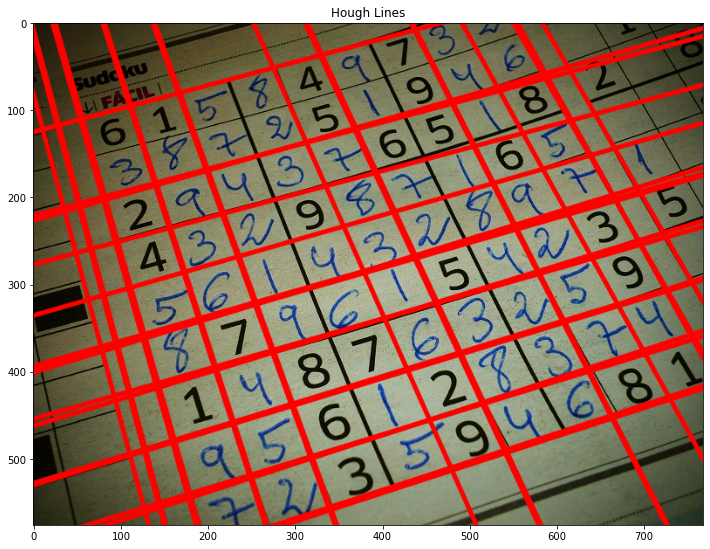

In [18]:
import math
image = cv2.imread('images/soduku.jpg')
show(image,"Original")

gray_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
edge = cv2.Canny(gray_img,100,170,apertureSize = 3)

lines =  cv2.HoughLines(edge, 1, np.pi / 180, 240) #Finds lines in a binary image using the standard Hough transform.

if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv2.line(image, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)
show(image,"Hough Lines")

- Circle Detection : In order to detect circles in images, you’ll need to make use of the cv2.HoughCircles function. 
https://docs.opencv.org/3.4/d4/d70/tutorial_hough_circle.html

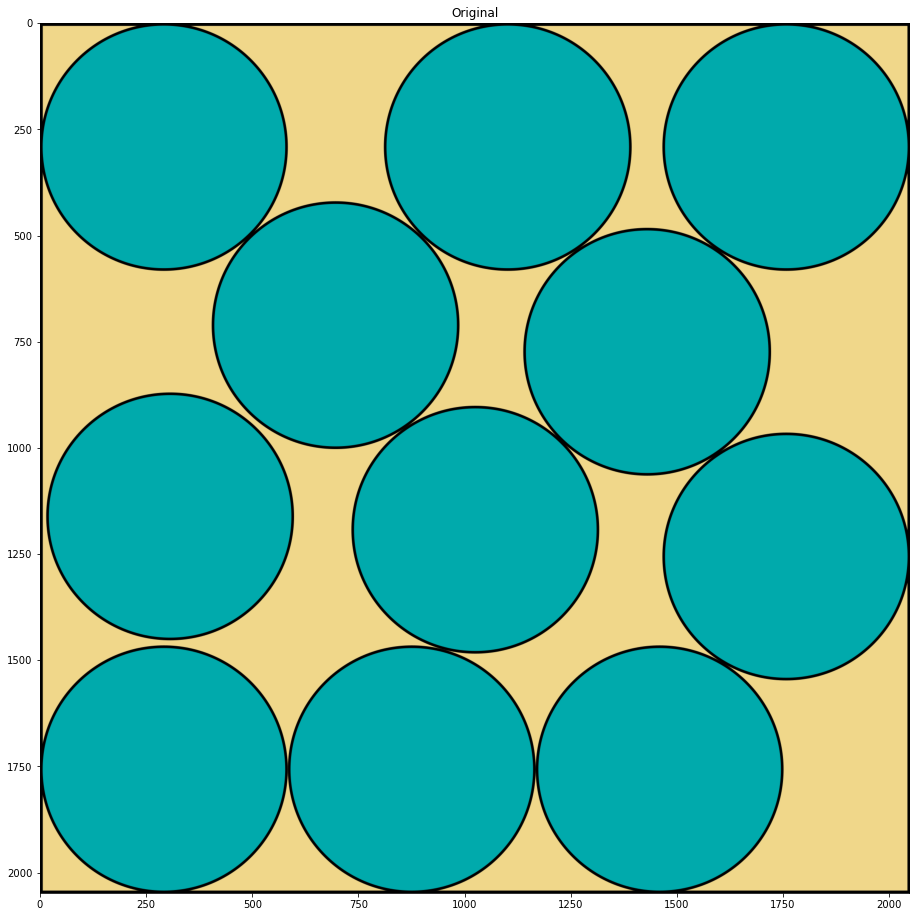

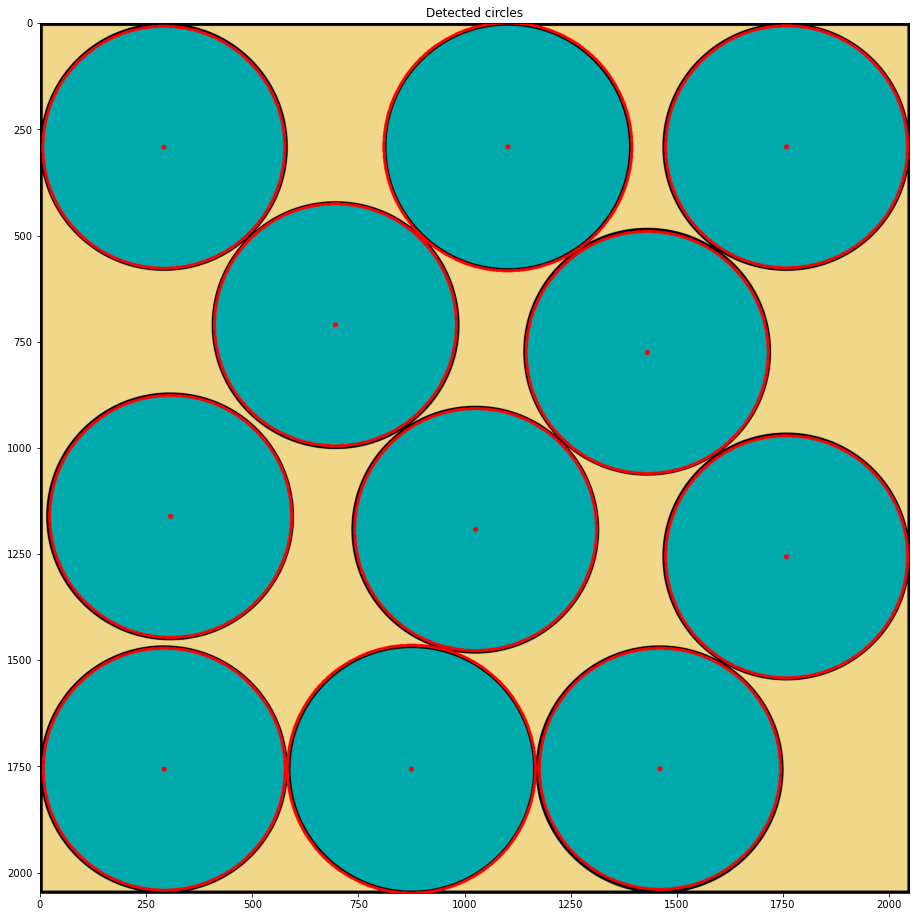

In [25]:
image = cv2.imread('images/circles.png')
show(image,"Original")
gray_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
blurred = cv2.medianBlur(gray_img,5)
circles = cv2.HoughCircles(blurred,cv2.HOUGH_GRADIENT,1.2,75)

cv2.HoughCircles(gray_img, cv2.HOUGH_GRADIENT, 1.2, 100)

circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(image,(i[0], i[1]), i[2], (0, 0, 255), 5)
    
    # draw the center of the circle
    cv2.circle(image, (i[0], i[1]), 2, (0, 0, 255), 8)

show(image,'Detected circles')

- Blob Detection : A Blob is a group of connected pixels in an image that share some common property. 

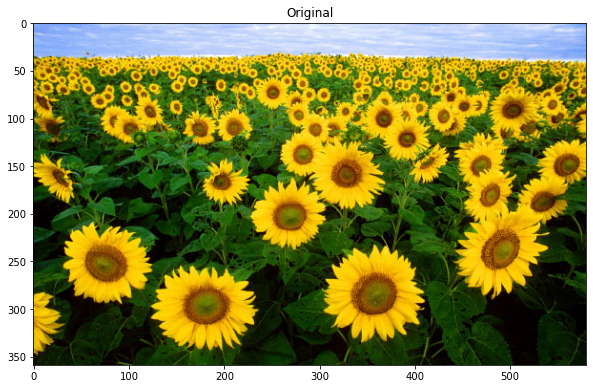

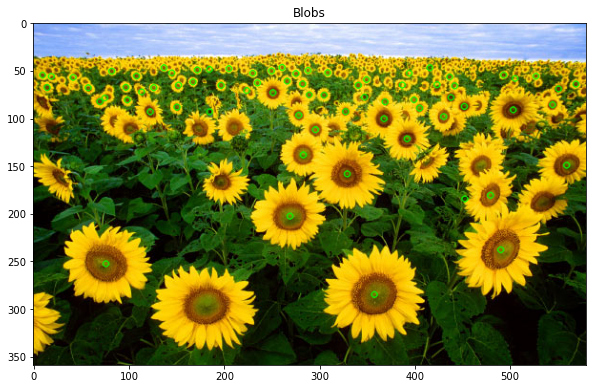

In [26]:
image = cv2.imread("images/Sunflowers.jpg")
show(image,"Original" )


detector = cv2.SimpleBlobDetector_create() #blob detector
 

keypoints = detector.detect(image) # Detect blobs
 
# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of
# the circle corresponds to the size of blob
blank = np.zeros((1,1)) 
blobs = cv2.drawKeypoints(image, keypoints, blank, (0,255,0),
                                      cv2.DRAW_MATCHES_FLAGS_DEFAULT)
 
# Show keypoints
show(blobs,"Blobs")